In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits

plt.set_cmap('gray')


%matplotlib inline

In [4]:
#open up a fits file
hdu = fits.open('spec-4742-55660-0911_I_7.75_model.fits')

In [5]:
#check the contents of the fits file
hdu.info()

Filename: spec-4742-55660-0911_I_7.75_model.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (215, 215)   float32   
  1                1 ImageHDU         9   (215, 215)   float32   
  2                1 ImageHDU        43   (215, 215)   float32   
  3                1 ImageHDU         6   (215, 215)   float32   


In [11]:
#check the header
#extension 1 is the image itself, 2 is the model, 3 is the residual
hdu[3].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  215 / Length of data axis 1                          
NAXIS2  =                  215 / Length of data axis 2                          
OBJECT  = 'residual map'       / Component type                                 

In [27]:
#load each of those
image = hdu[1].data
model = hdu[2].data
residual = hdu[3].data

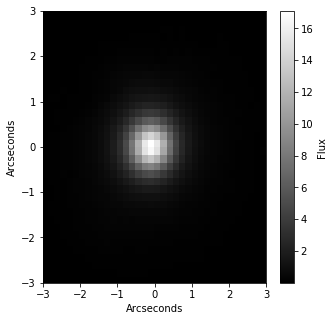

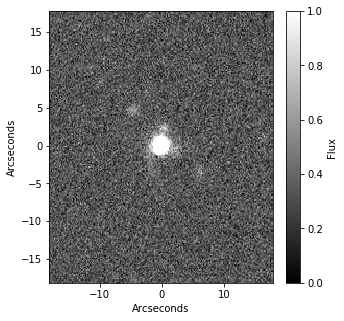

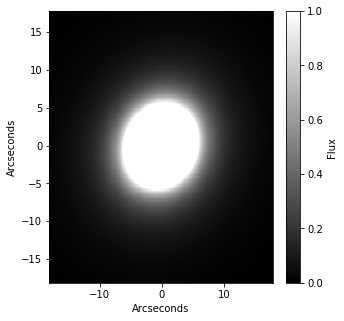

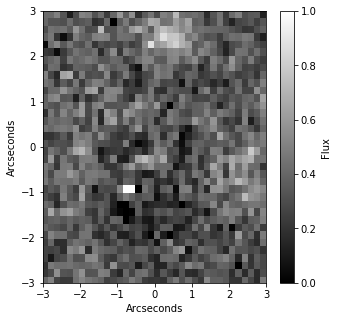

In [37]:
#set your x and y arrays
arcsec_per_pixel = .168
x_arr = (np.arange(0,len(image))-108)*arcsec_per_pixel
y_arr = (np.arange(0,len(image))-108)*arcsec_per_pixel

#make an initial plot
plt.figure(figsize=(5,5))
plt.pcolor(x_arr, y_arr, model)
plt.xlabel('Arcseconds')
plt.ylabel('Arcseconds')
plt.colorbar().set_label('Flux')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#try to z scale our image
from astropy.visualization import ZScaleInterval

interval = ZScaleInterval()

plt.figure(figsize=(5,5))
plt.pcolor(x_arr, y_arr, interval(image))
plt.xlabel('Arcseconds')
plt.ylabel('Arcseconds')
plt.colorbar().set_label('Flux')
#plt.xlim(-3,3)
#plt.ylim(-3,3)
plt.show()

plt.figure(figsize=(5,5))
plt.pcolor(x_arr, y_arr, interval(model))
plt.xlabel('Arcseconds')
plt.ylabel('Arcseconds')
plt.colorbar().set_label('Flux')
#plt.xlim(-3,3)
#plt.ylim(-3,3)
plt.show()

plt.figure(figsize=(5,5))
plt.pcolor(x_arr, y_arr, interval(residual))
plt.xlabel('Arcseconds')
plt.ylabel('Arcseconds')
plt.colorbar().set_label('Flux')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()